<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/Kaggle_Survey_viz_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me(Kaggle Survey Project)

- 취직을 앞둔 나에게 데이터 분석가가 되어 나아가야할 방향을 알고싶어 이 Project를 실시

- 데이터 분석가가 되고자 하는 이들에게도 주요한 Project가 될 것이다.

- 변수들 설명 ==> 'kaggle_survey_2020_answer_choices.pdf'
    - 39+ 질문 and 20,036 답변
    - 단답형 질문과 multiple choices가 있다.

- index[0]에 Questions이 있다. ==> index[0]가 columns로 처리

> feature 전처리
  - 나라(country)이름 처리(replace)
  - 성별(sex) man, woman처리(replace)
  - 나이(age) 처리

> 해야 할 것(To do)
  - EDA : 기본 인적 사항(完)
  - EDA : 연봉과 학위, 직업
  - EDA : DS 교육받는 곳, 가장 필요한 것(skill)




In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
font = dict(fontsize=20, fontweight='bold', fontfamily='serif')

In [219]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2020/kaggle_survey_2020_responses.csv')

In [220]:
data = data.T.reset_index(drop=True).set_index([0]).T  # column 처리
data['In which country do you currently reside?'] = data['In which country do you currently reside?'].replace({'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK', 'United Arab Emirates':'UAE', 'Iran, Islamic Republic of...':'Iran'})  # USA, US 처리

for i in ['Prefer to self-describe', 'Prefer not to say', 'Nonbinary']:
  data['What is your gender? - Selected Choice'] = data['What is your gender? - Selected Choice'].replace({i:np.NaN})  # 성별 man, woman 처리

data['What is your age (# years)?'] = data['What is your age (# years)?'].replace({'22-24':'22-29', '25-29':'22-29', '30-34':'30-39', '35-39':'30-39', '40-44':'40-49', '45-49':'40-49', '50-54':'50-59', '55-59':'50-59'})  # 나이 처리

# 1. EDA : 기본 인적 사항

In [145]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

Text(0.5, 0.98, 'Country(Top 21) - count, pie')

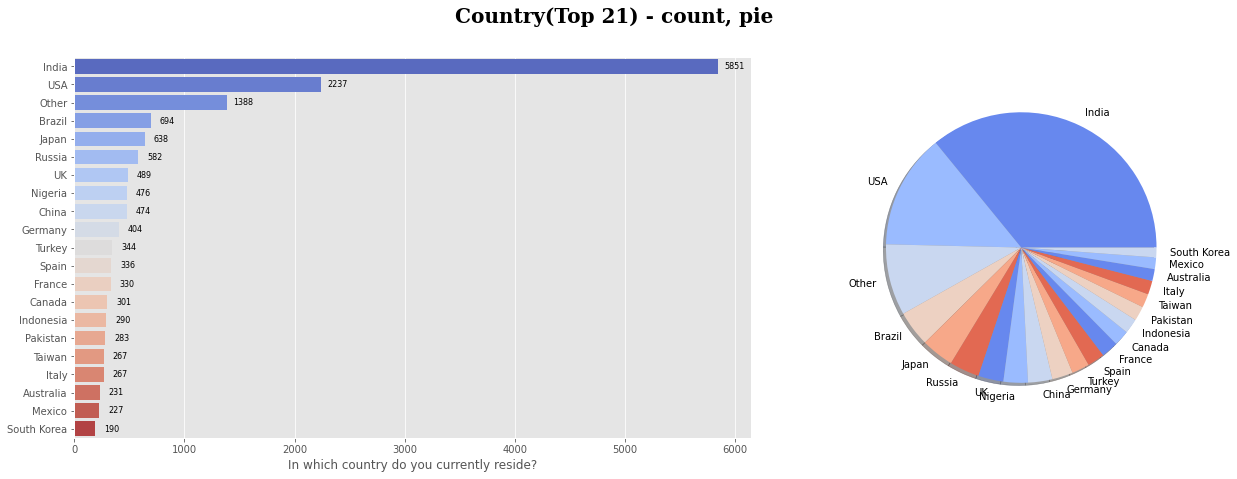

In [221]:
top_21_country = data['In which country do you currently reside?'].value_counts().sort_values(ascending=False)[:21]

fig, ax = plt.subplots(1, 2, figsize=(20,7), gridspec_kw={'width_ratios':[2, 1]})
sns.barplot(y=top_21_country.index, x=top_21_country, palette=sns.color_palette('coolwarm', n_colors=len(top_21_country.index)), ax=ax[0])
for i,j in enumerate(top_21_country.index):
  ax[0].annotate(f"{top_21_country[j]}", xy=(top_21_country[j] + 150, i), ha='center', va='center', fontsize=8, fontweight='light')

ax[1].pie(top_21_country, labels=top_21_country.index, shadow=True, colors=sns.color_palette('coolwarm'))

fig.suptitle('Country(Top 21) - count, pie', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Distribution of men and women by country')

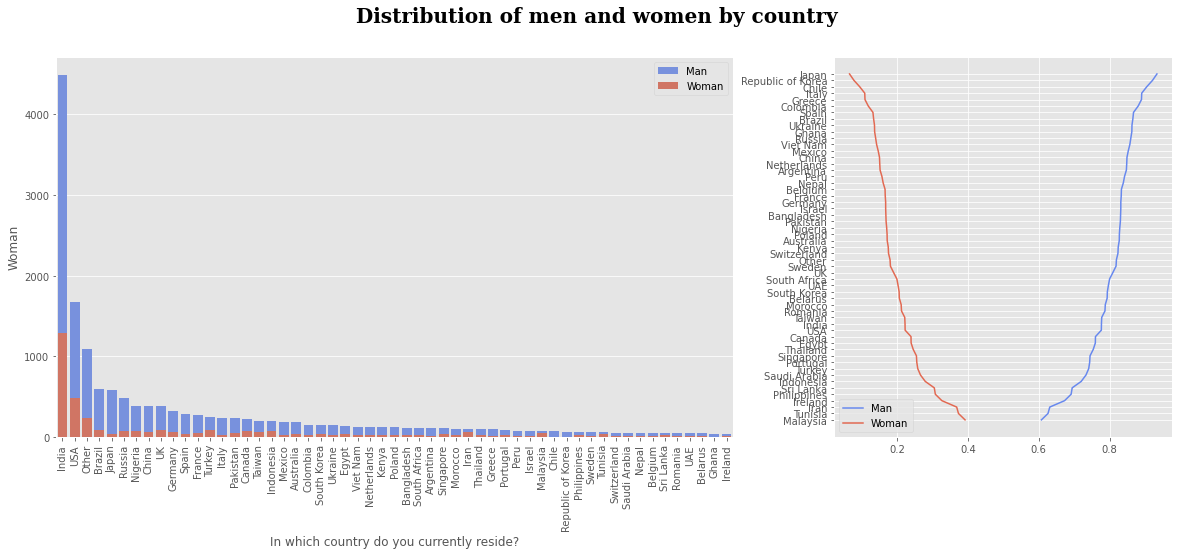

In [222]:
g_r = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts().unstack().sort_values('Man', ascending=False)
fig, ax = plt.subplots(1,2, figsize=(20,7), gridspec_kw={'width_ratios':[2, 1]})
sns.barplot(x=g_r.index, y=g_r['Man'], color=sns.color_palette('coolwarm')[0], label='Man', ax=ax[0])
sns.barplot(x=g_r.index, y=g_r['Woman'], color=sns.color_palette('coolwarm')[5], label='Woman', ax=ax[0])
ax[0].legend()
ax[0].set_xticklabels(g_r.index, rotation=90)

r_g = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts(normalize=True).unstack().sort_values('Woman', ascending=False)  # 각 나라의 남녀 비율

ax[1].plot(r_g['Man'], r_g.index, label='Man', color=sns.color_palette('coolwarm')[0])
ax[1].plot(r_g['Woman'], r_g.index, label='Woman', color=sns.color_palette('coolwarm')[5])
ax[1].legend()

fig.suptitle('Distribution of men and women by country', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Distribution of Age by country')

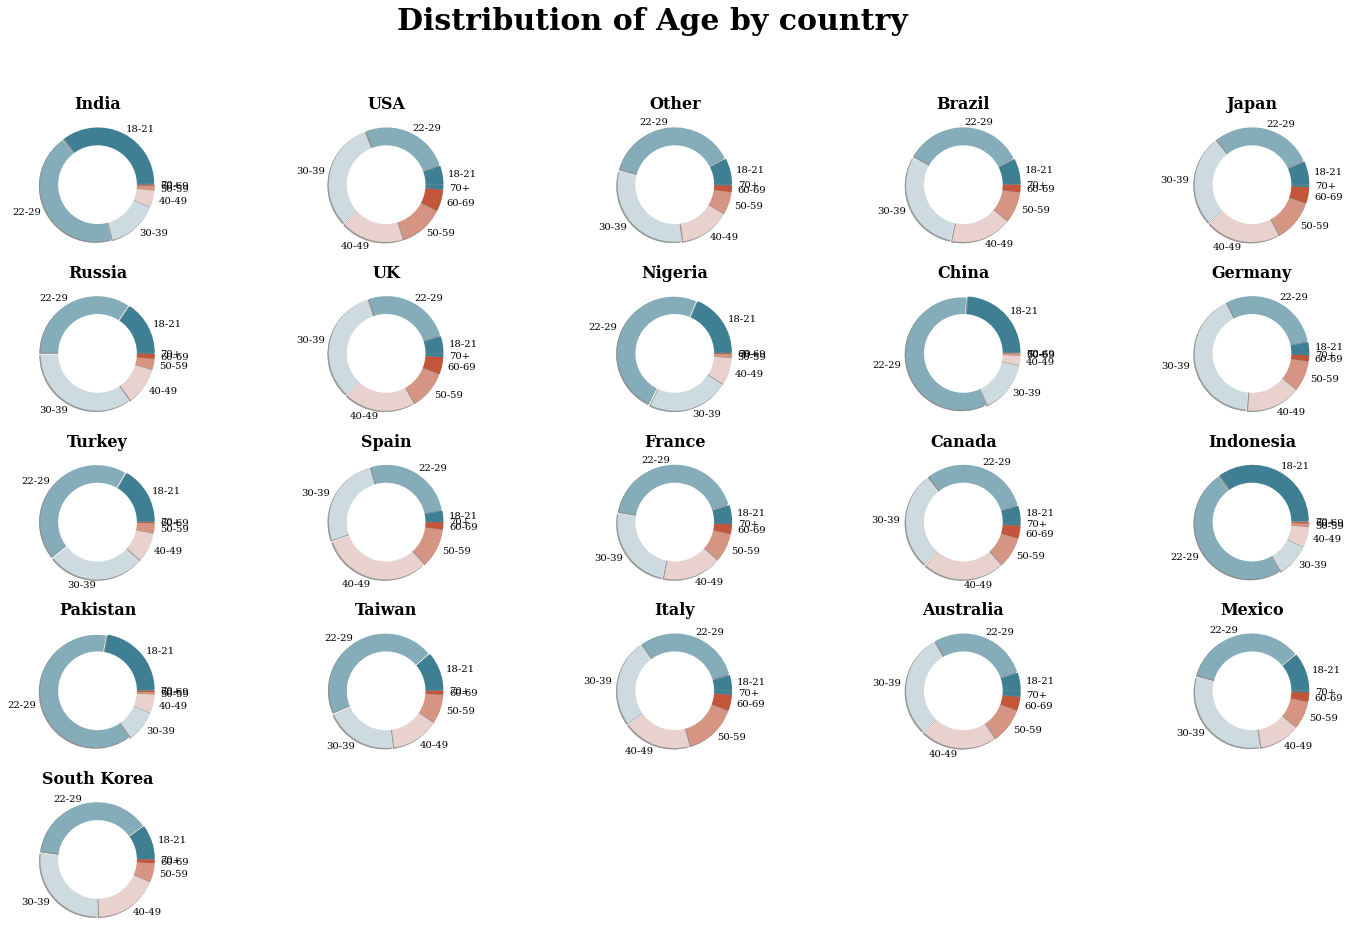

In [233]:
r_a = data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts()[top_21_country.index].unstack().fillna(0).T

fig = plt.subplots(figsize=(25,15))
for i,j in enumerate(r_a.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=r_a[j], labels=r_a[j].index, shadow=True, explode=[0.02 for i in range(len(r_a[j].index))], 
         colors=sns.diverging_palette(220, 20), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution of Age by country', fontsize=30, fontweight='bold', fontfamily='serif')

# 기본 인적사항 EDA으로 알 수 있는 것
- 전체 Answer중 국가(country) 분포(Top21) :
    - Top21 : 'India', 'USA', 'Other', 'Brazil', 'Japan', 'Russia', 'UK', 'Nigeria',
       'China', 'Germany', 'Turkey', 'Spain', 'France', 'Canada', 'Indonesia',
       'Pakistan', 'Taiwan', 'Italy', 'Australia', 'Mexico', 'South Korea' 순  **(Top 21)**
    - India, USA가 차지 하는 비율이 40%
    - 우리나라는 21위 딱 중위권이다. (실망...) --> Data Science에 관심있는 사람이 부족하다는 것을 말한다.
    - 국가별 연봉 분포 viz하기(column=What is your current yearly compensation (approximate $USD)?)

- 전체 Answer중 남녀(sex) 분포 : 
    - 남녀 평균 비율은 8:2 --> Data Science에 관심있는 성별은 남자
    - Top21 국가 중 Japan은 9.3:0.7의 성별분포를 가진다. --> 여성의 비율이 극히 낮음
    - 남녀별 연봉 분포 viz하기


- 전체 Answer중 나이(age) 분포 :
    - 대체로 18-49세까지의 나이가 제일 많이 분포
    - India, Nigeria, China, Indonesia, Pakistan에서 18-29세 이용자가 70% 이상을 차지하고 있다. --> 젊은 Data 분석가가 많음, IT종사자가 많음
    - India, Nigeria, China, Indonesia, Pakistan를 제외하면 22-49세 이용자가 50% 이상을 차지함
    - 1인당 GDP가 높은 나라 일수록 40+ 이용자가 많음



# 2. EDA : 연봉과 학위, 직업